In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Excel file to check its content
file_path = '/content/Cleaned_Combined_Clubs_finals.xlsx'
xls = pd.ExcelFile(file_path)

# Check the sheet names first
xls.sheet_names


['Sheet1']

In [3]:
# Load the content of the first sheet to examine its structure
df = pd.read_excel(xls, sheet_name='Sheet1')

# Display the first few rows of the dataset to understand its structure
df.head()


,Formation,xG,xGA,Poss,xA,KP,PPA,PrgP
0,5-4-1,0.3,0.7,55,0.4,8,6,36
1,4-4-2,1.8,0.6,34,1.0,12,9,31
2,4-3-3,0.7,2.2,53,0.6,11,7,31
3,4-2-3-1,1.3,0.8,40,0.7,6,2,28
4,4-2-3-1,0.7,2.6,49,0.9,8,10,44


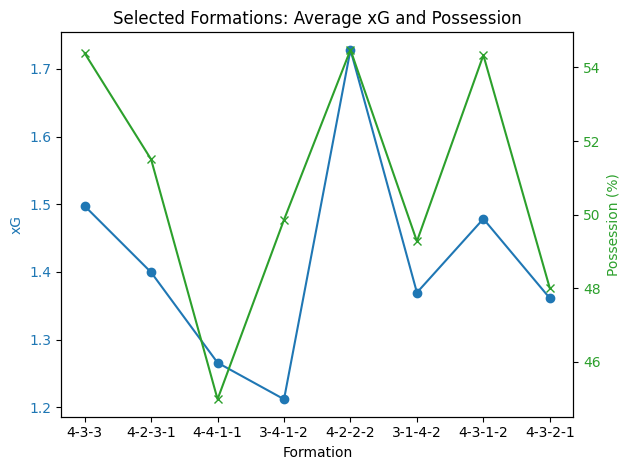

In [4]:
# Let's filter the data to keep only the formations from the provided screenshot.
grouped_df = df.groupby('Formation').mean()

# List of formations to keep
formations_to_keep = ['4-3-3', '4-2-3-1', '4-4-1-1', '3-4-1-2', '4-2-2-2', '3-1-4-2', '4-3-1-2', '4-3-2-1']

# Filter the dataset to keep only these formations
filtered_formations = grouped_df.loc[formations_to_keep]

# Regenerate the visualizations based on the selected formations

# 1. Dual Axis Chart of Average xG and Possession by the Selected Formations
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Formation')
ax1.set_ylabel('xG', color=color)
ax1.plot(filtered_formations.index, filtered_formations['xG'], color=color, marker='o', label="xG")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Possession (%)', color=color)
ax2.plot(filtered_formations.index, filtered_formations['Poss'], color=color, marker='x', label="Possession (%)")
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Selected Formations: Average xG and Possession')
fig.tight_layout()

plt.show()


This chart shows the relationship between expected goals (xG) and possession percentage for each formation. Formations are plotted along two axes, with xG indicating offensive potential and possession showing the level of control.

Key Insights:
Formations like 4-2-2-2 stand out with both high possession and a high xG, indicating strong offensive control and ability to create scoring chances.
4-2-3-1 and 3-1-4-2 maintain moderate possession but produce lower xG, suggesting inefficiency in converting possession into meaningful chances.
4-4-1-1 is possession-heavy but lacks offensive output, which may indicate a more defensive setup or struggles in breaking down opposition defenses.

Coaching Recommendation:
Coaches should consider using formations like 4-2-2-2 when they need to dominate possession and create multiple chances. However, formations like 4-4-1-1 might be better for teams that want to control the game defensively while sacrificing offensive pressure.



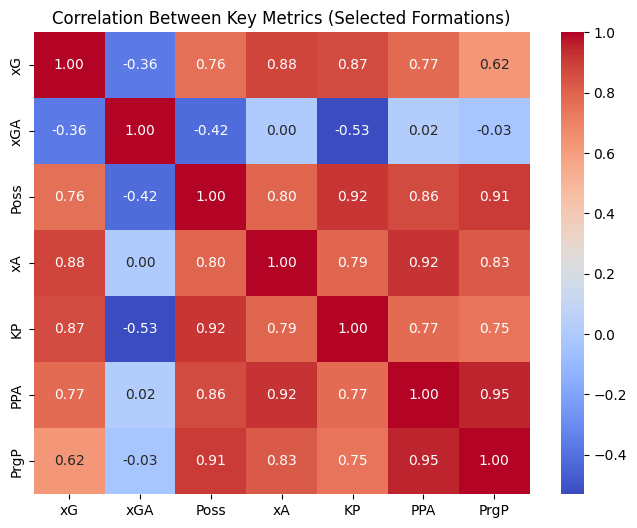

In [5]:
# 2. Heatmap of Correlation Among Key Metrics for the Selected Formations

# Create a heatmap using the selected formations data
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_formations[['xG', 'xGA', 'Poss', 'xA', 'KP', 'PPA', 'PrgP']].corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Between Key Metrics (Selected Formations)')
plt.show()


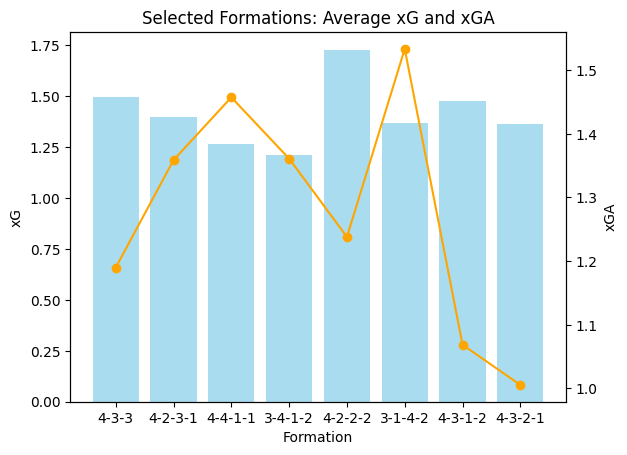

In [6]:
# 3. Bar and Line Chart Showing Average xG and xGA for the Selected Formations

fig, ax = plt.subplots()

# Bar chart for xG
ax.bar(filtered_formations.index, filtered_formations['xG'], label='xG', color='skyblue', alpha=0.7)

# Line chart for xGA
ax2 = ax.twinx()
ax2.plot(filtered_formations.index, filtered_formations['xGA'], label='xGA', color='orange', marker='o')

# Labels and title
ax.set_xlabel('Formation')
ax.set_ylabel('xG')
ax2.set_ylabel('xGA')
plt.title('Selected Formations: Average xG and xGA')

plt.show()


<ipython-input-7-3132d62f724b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(filtered_formations['xG'][i], filtered_formations['xGA'][i], formation, fontsize=9)


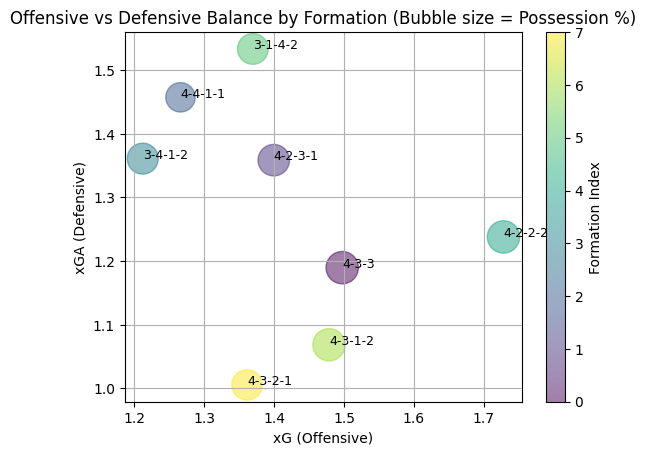

In [7]:
# Bubble chart to visualize Offensive vs Defensive balance with xG, xGA and Possession
fig, ax = plt.subplots()

# Create bubble chart
scatter = ax.scatter(filtered_formations['xG'], filtered_formations['xGA'],
                     s=filtered_formations['Poss']*10, alpha=0.5,
                     c=range(len(filtered_formations)), cmap='viridis')

# Add labels to each bubble
for i, formation in enumerate(filtered_formations.index):
    ax.text(filtered_formations['xG'][i], filtered_formations['xGA'][i], formation, fontsize=9)

# Add axis labels and title
ax.set_xlabel('xG (Offensive)')
ax.set_ylabel('xGA (Defensive)')
plt.title('Offensive vs Defensive Balance by Formation (Bubble size = Possession %)')

plt.colorbar(scatter, label='Formation Index')
plt.grid(True)
plt.show()


bubble chart that represents the balance between offense (xG) and defense (xGA) for the selected formations, with the bubble size indicating the possession percentage for each formation.

This visualization helps to visually compare how different formations balance offensive and defensive strength, and it shows how possession plays a role in their overall effectiveness.

<ipython-input-8-1afa59cd06bf>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(filtered_formations['KP'][i], filtered_formations['xG'][i], formation, fontsize=9)


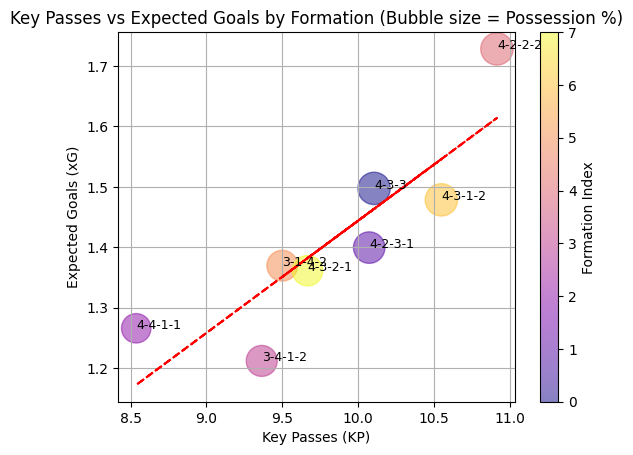

In [8]:
# Scatter plot with regression line to show the relationship between Key Passes (KP) and Expected Goals (xG)

import numpy as np

fig, ax = plt.subplots()

# Scatter plot of KP vs xG
scatter = ax.scatter(filtered_formations['KP'], filtered_formations['xG'],
                     s=filtered_formations['Poss']*10, alpha=0.5,
                     c=range(len(filtered_formations)), cmap='plasma')

# Regression line
m, b = np.polyfit(filtered_formations['KP'], filtered_formations['xG'], 1)
ax.plot(filtered_formations['KP'], m*filtered_formations['KP'] + b, color='red', linestyle='--', label='Regression Line')

# Add labels to each point
for i, formation in enumerate(filtered_formations.index):
    ax.text(filtered_formations['KP'][i], filtered_formations['xG'][i], formation, fontsize=9)

# Add axis labels and title
ax.set_xlabel('Key Passes (KP)')
ax.set_ylabel('Expected Goals (xG)')
plt.title('Key Passes vs Expected Goals by Formation (Bubble size = Possession %)')
plt.colorbar(scatter, label='Formation Index')

plt.grid(True)
plt.show()


the relationship between Key Passes (KP) and Expected Goals (xG). The bubble size represents the possession percentage for each formation.

This visualization highlights how formations with more key passes tend to create higher expected goals (xG), which indicates their ability to generate scoring opportunities. The regression line shows the positive correlation between key passes and expected goals. **bold text**